In [73]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore') 

### 데이터 불러오기

In [24]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [25]:
combined = [train, test]

### 데이터 info 체크 (칼럼명, Null 값 등)
+ COMPONENT_ARBITRARY 값만 범주형이고 나머지는 숫자형 데이터
+ train_df와 test_df 칼럼 갯수가 다름

In [26]:
for i in combined:
    i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

In [27]:
print(f"train 칼럼 갯수 : {len(train.columns)}, test 칼럼 갯수 : {len(test.columns)}")
# train와 test_의 칼럼 개수가 다름 확인 (54개 : 19개)

train 칼럼 갯수 : 54, test 칼럼 갯수 : 19


In [42]:
train.describe(include="all")

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
count,14095,14095,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,...,2316.000000,2316.000000,2118.000000,2118.000000,2118.000000,14095.000000,3724.000000,14095.000000,14095.000000,14095.000000
unique,14095,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,TRAIN_00000,COMPONENT3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,7050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3146.082937,2013.652501,7.600568,387.416885,0.025825,12.707698,64.026179,0.692799,...,29.870898,56.063472,239.938149,5488.693107,19415.597262,0.050656,13.576230,109.355815,588.646825,0.085349
std,NaN,NaN,4216.089809,3.964758,11.681628,550.016073,0.171926,86.968000,102.876871,2.905491,...,97.459625,184.332678,685.053457,15474.146283,40145.311444,0.475438,1.073718,49.612379,531.743393,0.279411
min,NaN,NaN,1000.000000,2007.000000,0.000000,200.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,15.000000,154.000000,0.000000,5.200000,2.900000,0.000000,0.000000
25%,NaN,NaN,1655.000000,2010.000000,3.000000,200.000000,0.000000,1.000000,3.000000,0.000000,...,3.000000,5.000000,22.000000,636.750000,5409.250000,0.000000,12.900000,71.800000,37.000000,0.000000
50%,NaN,NaN,2227.000000,2014.000000,5.000000,200.000000,0.000000,2.000000,11.000000,0.000000,...,7.000000,13.000000,57.000000,1753.000000,12691.500000,0.000000,13.500000,111.300000,520.000000,0.000000
75%,NaN,NaN,3797.000000,2017.000000,8.000000,410.000000,0.000000,4.000000,110.000000,0.000000,...,23.000000,39.250000,189.000000,5517.750000,24535.750000,0.000000,14.200000,137.200000,1119.000000,0.000000


### Null 값 체크
- 널값이 소수인 칼럼과 대다수가 널값인 칼럼으로 구분 가능 (fillna를 할 것과 dropna 할 것 구분해야 할 듯)
- test_df에는 null 값이 없고, train_df의 칼럼 중 test_df 칼럼에 해당하는 칼럼들은 널값이 없음

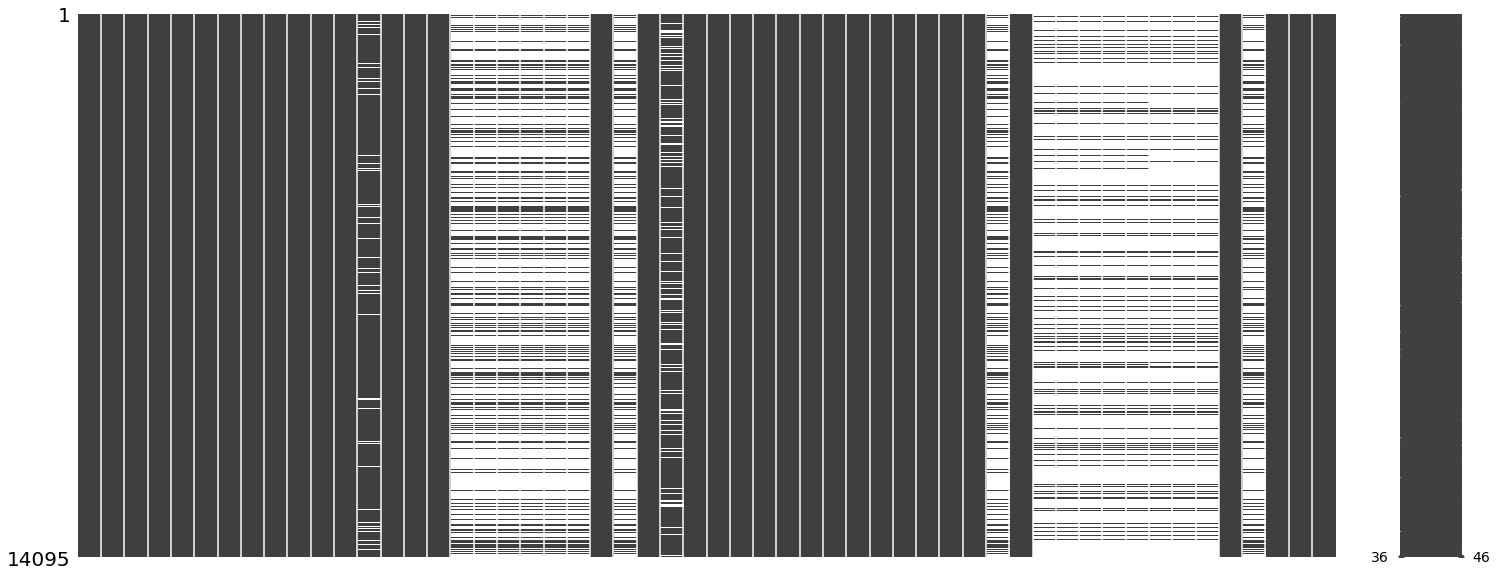

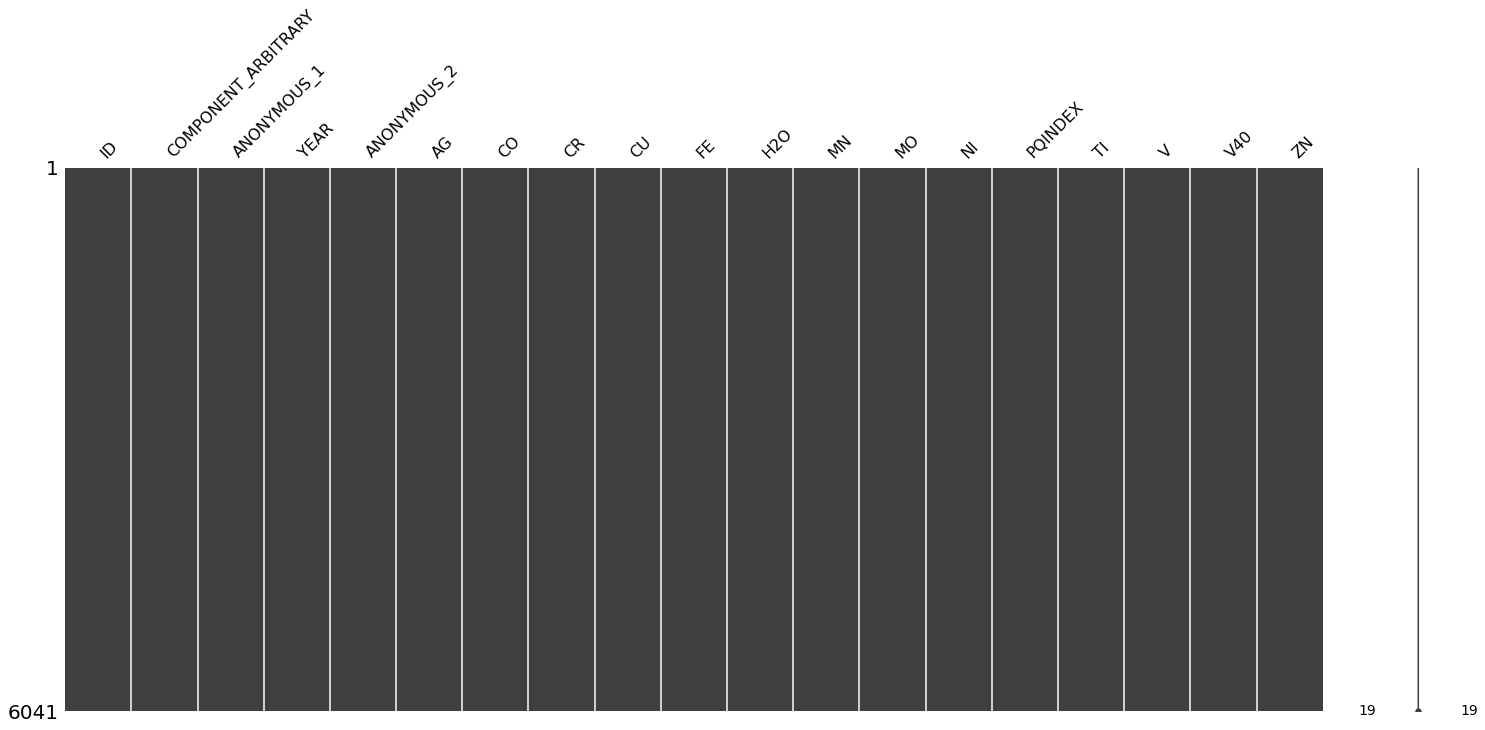

In [28]:
import missingno as msno
%matplotlib inline
for a in combined:
    msno.matrix(a)

#### train_df의 Y_LABEL 값 확인 (훈련데이터의 결과 값)

In [29]:
train.Y_LABEL.value_counts()

0    12892
1     1203
Name: Y_LABEL, dtype: int64

### 시각화

In [30]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

In [44]:
# 데이터 프레임에서 특정 필드를 기반으로 그래프를 그리기 위한 df로 변환하기
def create_chart_df(feature):
	
	정상 = train[train['Y_LABEL'] == 0][feature].value_counts()
	이상 = train[train['Y_LABEL'] == 1][feature].value_counts()

	chart_df = pd.DataFrame([정상, 이상])
	chart_df.index = ['정상', '이상']  

	return chart_df

#### COMPONENT_ARBITRARY

In [71]:
chart_df = create_chart_df("COMPONENT_ARBITRARY")
chart_df.iplot(kind="bar")

In [53]:
chart_df

,0,1,2,3
정상,12596.0,270.0,25.0,1.0
이상,1165.0,35.0,3.0,NaN


In [55]:
chart_df = create_chart_df("YEAR")
chart_df.iplot(kind="bar")

In [56]:
chart_df

,2014,2008,2013,2015,2011,2012,2016,2017,2018,2009,2010,2019,2021,2020,2022,2007
정상,1284,1254,1100,1079,1046,989,889,850,830,800,738,628,441,351,321,292
이상,116,165,89,77,100,84,53,46,48,149,128,21,36,22,33,36


In [94]:
train["MO"].iplot(kind='hist', bins=50)

In [95]:
train[['AL',"BA"]].scatter_matrix()